In [1]:
import nltk

In [2]:
import pandas as pd
import numpy as np
import re

In [4]:
msg=pd.read_csv(r"C:\Users\sivacatering\Documents\Afitech attachments\spam classification\SMSSpamCollection",sep='\t',names=["label", "message"])
msg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 43.6+ KB


In [5]:
msg.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## So we have more records which is classified as ham(not a spam message)
## So the model can pretty well learn the pattern for a message which is not a spam

# Implementing wordcloud to visualize the most repeated words

In [45]:
import wordcloud

In [46]:
from wordcloud import WordCloud

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

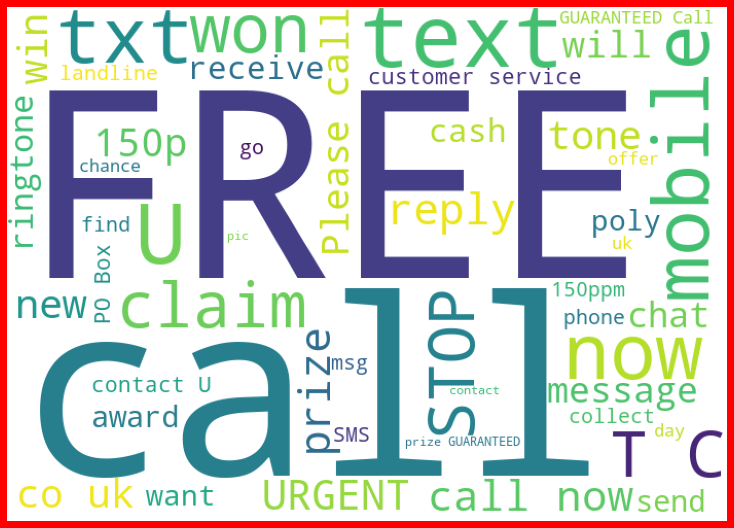

In [49]:
spams=msg["message"][msg["label"]=="spam"]
spam_cloud=WordCloud(width=700,height=500,background_color="white",max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## We can see that the words free,call,urgent,claim are mostly used in spam messages

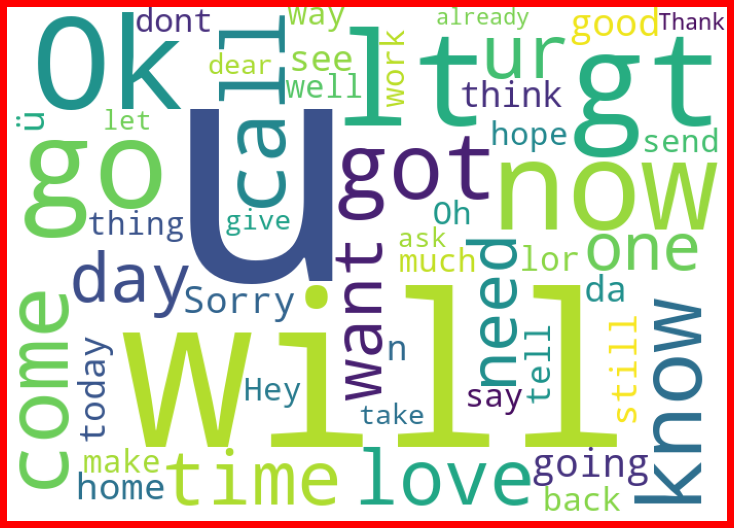

In [51]:
ham=msg["message"][msg["label"]=="ham"]
ham_cloud=WordCloud(width=700,height=500,background_color="white",max_words=50).generate(' '.join(ham))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ham_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## we can clearly see some of the most repeated words which is used in ham messages

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sivacatering\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Data cleaning and pre-processing

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]

In [9]:
for i in range(0,len(msg)):
    review=re.sub('[^a-zA-Z]', ' ', msg['message'][i])
    review=review.lower()
    review=review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
corpus[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

### Here we can see that the less important words are removed with stopwords
### Punctuations are removed
### The sentence is lowered and splitted.
### And stematization is applied to the words

In [13]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [17]:
X[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### We can see that the words are vectorized (i.e converted as numerical)

In [18]:
label=msg["label"]

In [19]:
label.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [20]:
label=label.replace({"ham":1,"spam":0})

In [22]:
y=label

# Splitting data for train and test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 420)

# Classifying the data using algorithms

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
svm = SVC(random_state=6)
nbc=MultinomialNB()

In [26]:
models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,"Naive Bayes":nbc}
test_scores= { }
train_scores={ }

In [29]:
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    test_scores[key] = model.score(X_test, y_test)
    train_scores[key]=model.score(X_train,y_train)

In [31]:
datal = {"train":train_scores,"test":test_scores} 
  
# Creates pandas DataFrame. 
score_frame = pd.DataFrame(datal, index =test_scores.keys())
score_frame.sort_values(by=["train","test"], axis=0 ,ascending=False, inplace=True) 
# print the data 
score_frame

,train,test
Decision tree,1.000000,0.967696
Random forest,0.999761,0.977028
SVM,0.995693,0.976310
Naive Bayes,0.989471,0.982771
KNN,0.868390,0.858579


## In this we can see that most of the algorithms gives good accuracy except KNN
## Among these we can see that the naive bayes works well with spam classification
## Naive Bayes gives low bias and low variance

# Evaluation Metrics

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
pred=nbc.predict(X_test)

## Confusion matrix - Actual vs presdicted

In [34]:
conf=confusion_matrix(y_test,pred)
conf

array([[ 186,   11],
       [  13, 1183]], dtype=int64)

## Accuracy

In [35]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.9827709978463748

## Classification Report

In [38]:
report=classification_report(y_test,pred,output_dict=True)

In [40]:
df = pd.DataFrame(report).transpose()

In [41]:
df

,precision,recall,f1-score,support
0,0.934673,0.944162,0.939394,197.000000
1,0.990787,0.989130,0.989958,1196.000000
accuracy,0.982771,0.982771,0.982771,0.982771
macro avg,0.962730,0.966646,0.964676,1393.000000
weighted avg,0.982852,0.982771,0.982807,1393.000000
